In [8]:
import os
import PyPDF2
import fitz

In [9]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [10]:
dir = 'annoted_sustainability_reports/Info_Tech'
 

In [11]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
#     highlighted_sentences = s.split('.')
    highlighted_sentences = tokenize.sent_tokenize(s)

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    rel_text.append(highlighted_sentences)

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)


annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf
Document('annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf')
['In this context we announced three new industry-leading environmental goals in October 2020: achieve net-zero emissions by 2025, move to zero waste and plan for water risk.We’ll focus first on actual reductions in our emissions by powering our offices with 100% renewable energy, engaging key suppliers to reduce their emissions and equipping our people to make climate-smart travel decisions.', 'To address remaining emissions, we’ll invest in proprietary, nature-based carbon removal solutions, such as large-scale tree planting, that will directly remove carbon emissions from the atmosphere.', 'In addition, at Accenture in Sweden, we have committed to reduce our CO2 emissions from air travel with 50% per employee by 2023, with fiscal year 2018 as the baseline.', 'To reach our net-zero goal 

['By the end of the fiscal year ending January 31, 2025, we plan to purchase or generate enough renewable energy to match 100% of our global electricity usage for our offices and data centers.GHG EMISSIONSWe sourced 38% of our FY22 electricity use from renewable sources, a 13 percentage point increase from the previous year.', "In addition to similarly advanced levels of energy- and water-efficient design, this building features biophilic elements and a shade-providing external trellis that will house 390 kW of solar panels to harness Santa Clara's sunny weather.Our Bengaluru, India site sourced almost 90% of building electricity use from local solar projects, and we purchased green tariffs for four offices in Europe and the united States.", 'ENERGY'] 
 3
annoted_sustainability_reports/Info_Tech/Oracle_2020_Corporate_Citizenship_report.pdf
Document('annoted_sustainability_reports/Info_Tech/Oracle_2020_Corporate_Citizenship_report.pdf')
['59% of electricity use at Oracle Cloud data cent

['In 2020, Visa issued our inaugural green bond for $500 million, maturing in 2027.Encouraging the use of videoconferencing technology to reduce the need for business travel.', 'In 2020, we expanded our offerings and capabilities in this area in response to our remote working situation.As we began 2020, we announced the achievement of our goal to transition to using 100 percent renewable electricity.', 'In 2020, our Scope 1 and 2 GHG emissions, measured in absolute terms with a market-based approach, were 13,900 metric tons of carbon dioxide equivalent (MTCO2 e).', 'This represents a 77 percent decrease year-over-year from (MTCO2 represents a 77 percent decrease year-over-year from 2019.', 'The decrease in our Scope 1 and 2 emissions is largely due to the achievement of our goal to transition to 100 percent renewable electricity.', 'In carbon intensity, our Scope 1 and 2 emissions saw significant improvements in 2020 vs 2019: - Decreased 77 percent per employee - Decreased 78 percent p

In [12]:
#Extracting all sentences from the file
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f, 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""

    for count in range(len(fitz.open(f))):
        # print(count)
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        

    pdfFileObj.close() 
#     total_sentences = t.split('.')
    total_sentences = tokenize.sent_tokenize(t)
    print(len(total_sentences))

    all_text.append(total_sentences)

    num_sentences = len(total_sentences)

    sentences_list.append(num_sentences)

#1910 total sentences in Amazon_2021_sustainability_report.pdf


annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf
422
annoted_sustainability_reports/Info_Tech/Broadcom_ESG_report.pdf
438
annoted_sustainability_reports/Info_Tech/Mastercard_2021_Sustainability_report.pdf
1116
annoted_sustainability_reports/Info_Tech/Nvidia_2022_CSR_report.pdf
910
annoted_sustainability_reports/Info_Tech/Oracle_2020_Corporate_Citizenship_report.pdf
454
annoted_sustainability_reports/Info_Tech/Cisco_2021_Purpose_report.pdf
1349
annoted_sustainability_reports/Info_Tech/Microsoft_2021_Environmental_Sustainability_Report.pdf
1827
annoted_sustainability_reports/Info_Tech/VIsa_2020_ESG_report.pdf
559
annoted_sustainability_reports/Info_Tech/Adobe_2021_CSR_Report.pdf
172
annoted_sustainability_reports/Info_Tech/Apple_2022_Environmental_Progress_Report.pdf
1751


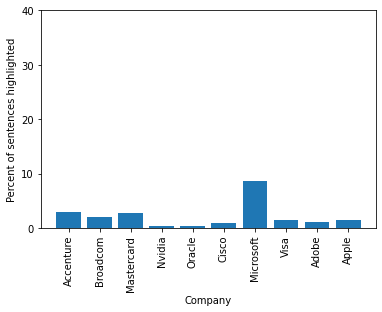

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Accenture", "Broadcom", "Mastercard", "Nvidia", "Oracle", "Cisco", "Microsoft", "Visa", "Adobe", "Apple"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [14]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      2.213927
std       2.400558
min       0.329670
25%       1.013455
50%       1.486552
75%       2.597032
max       8.593322
dtype: float64

In [15]:
#storing variable so they can be called between notebooks (for ML and aggregate work later on)

IT_reltext = rel_text
IT_alltext = all_text

%store IT_reltext
%store IT_alltext

Stored 'IT_reltext' (list)
Stored 'IT_alltext' (list)


In [16]:
def extract_sentences(text):
    sentences = []
    for report in text:
        for sent in report:
            sentences.append(sent)
    return sentences

In [17]:
pd.DataFrame(extract_sentences(IT_reltext)).to_csv("IT_reltext.csv", encoding = 'utf-8-sig')

In [18]:
pd.DataFrame(extract_sentences(IT_alltext)).to_csv("IT_alltext.csv", encoding = 'utf-8-sig')